BMW Prediction

This project is a showcase where data engineering techniques are applied and predictions are made through different machine learning models. In addition to this, each model will be evaluated through different metrics and plots.

Yor task as a data scientist is to clean and preprosses de data in the file bmw_pricing_v2.csv and predict the potential price for each car.

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [384]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [385]:
bmw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clases/bmw_pricing_v2.csv')


#EDA

In [386]:
bmw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [387]:
bmw_df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Text(0.5, 1.0, 'Number of cars based on size')

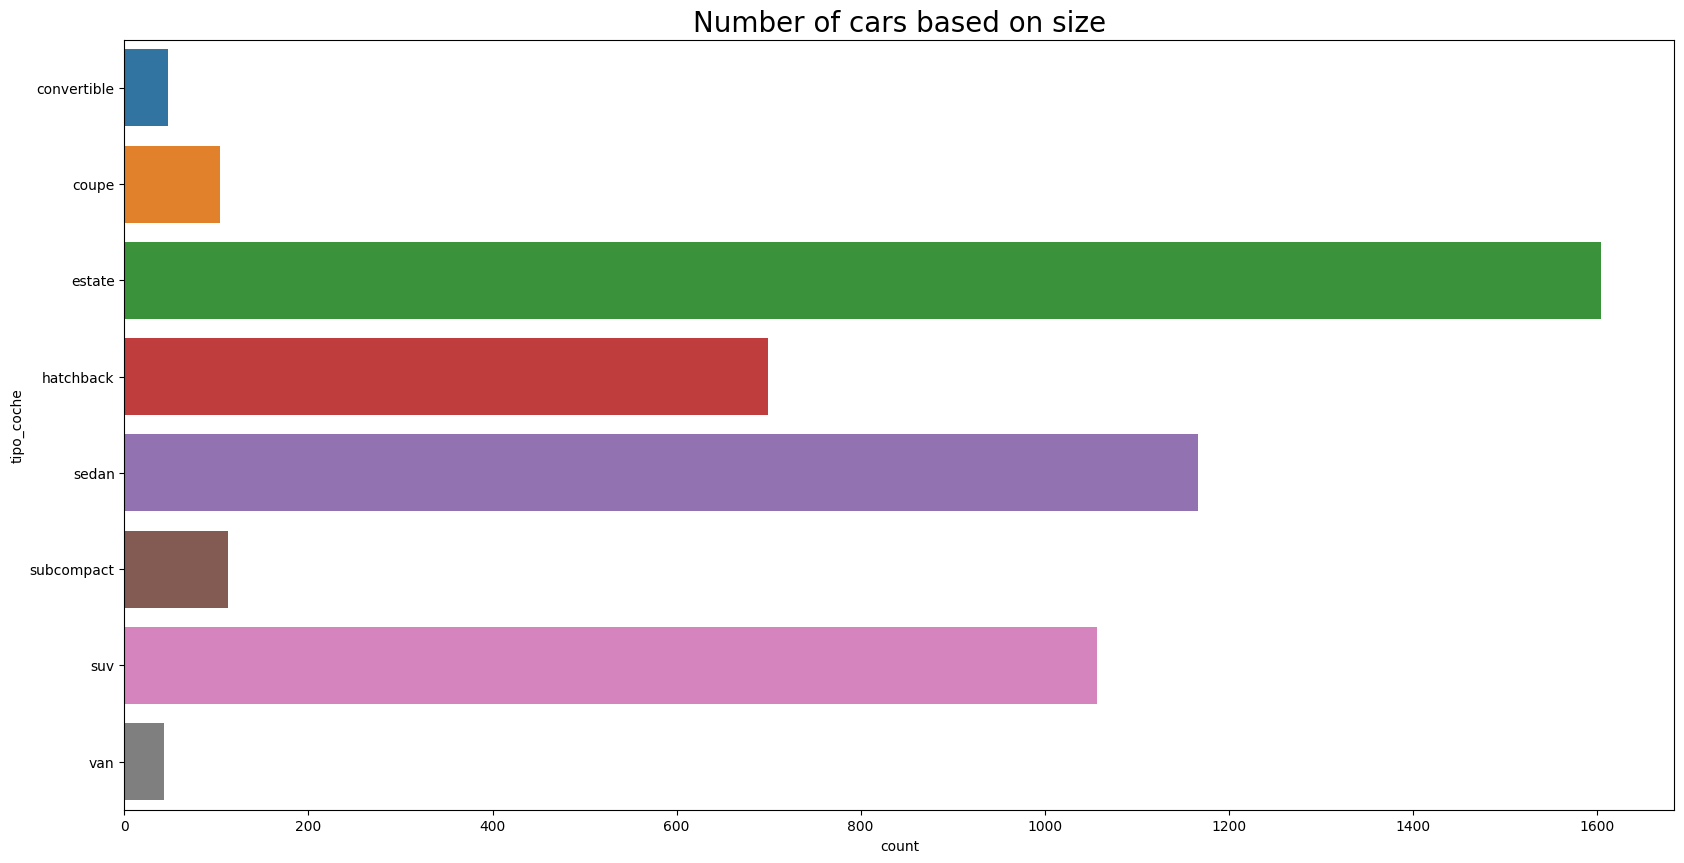

In [388]:
plt.figure(figsize=(20,10))
sns.countplot(y=bmw_df.tipo_coche, data=bmw_df)
plt.title('Number of cars based on size', fontsize=20)

Most of the car observation are estate cars, something aligned with reality since people prefers comfortability and spacious over style like coupe.

In [389]:
for i in 'fecha_registro', 'fecha_venta':
  bmw_df[i]=pd.to_datetime(bmw_df[i])

Text(0.5, 1.0, 'Number of cars in different years')

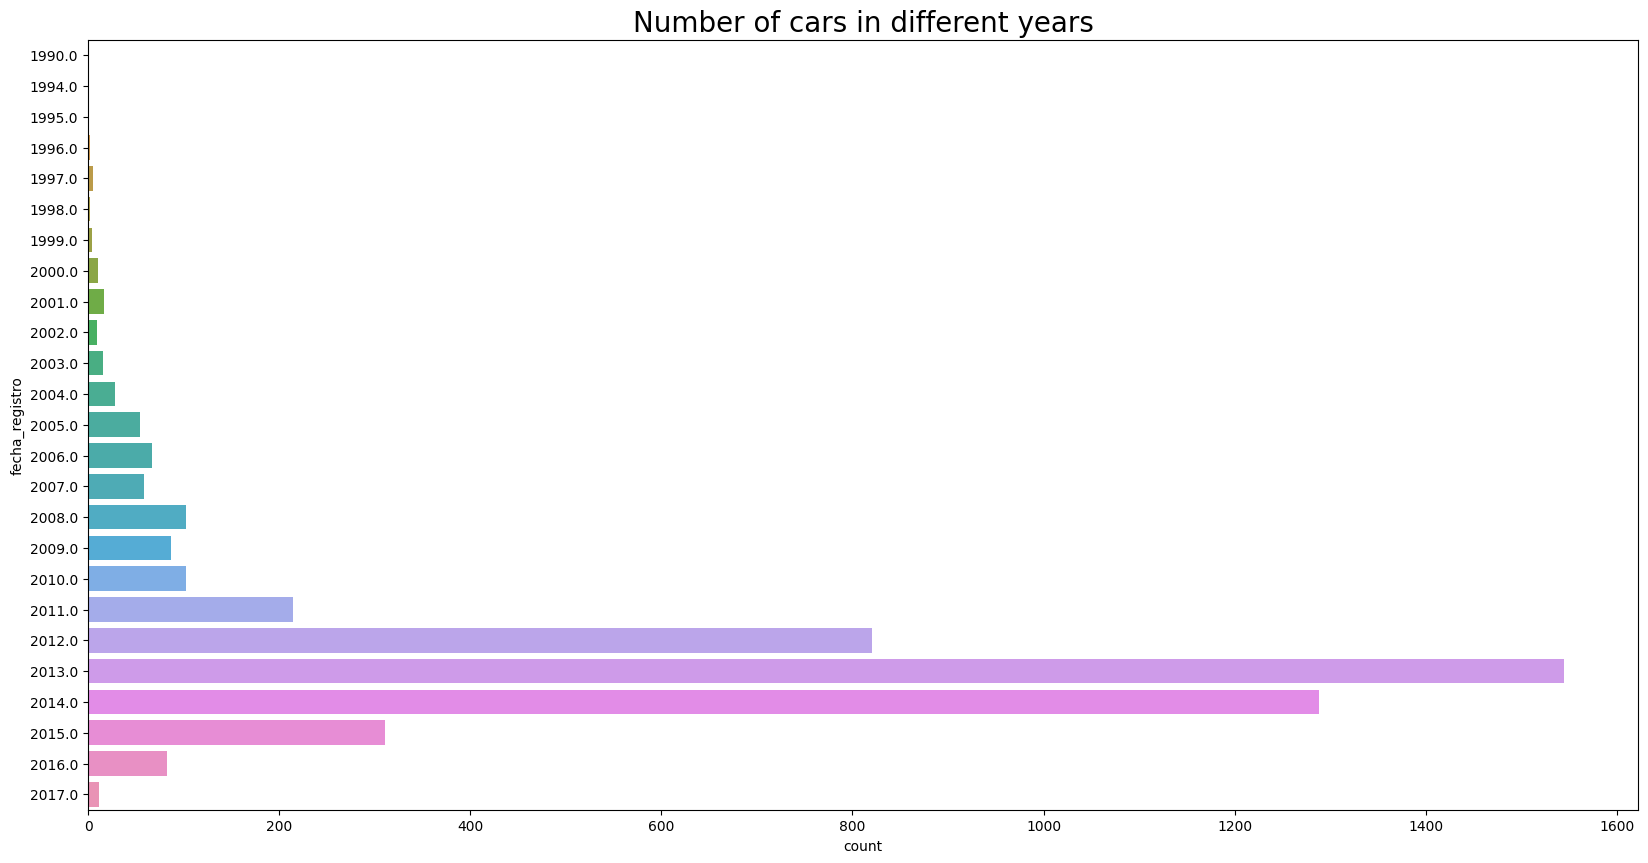

In [390]:
plt.figure(figsize=(20,10))
sns.countplot(y= bmw_df.fecha_registro.dt.year)
plt.title('Number of cars in different years', fontsize=20)

Text(0.5, 1.0, 'Average price based on engine type')

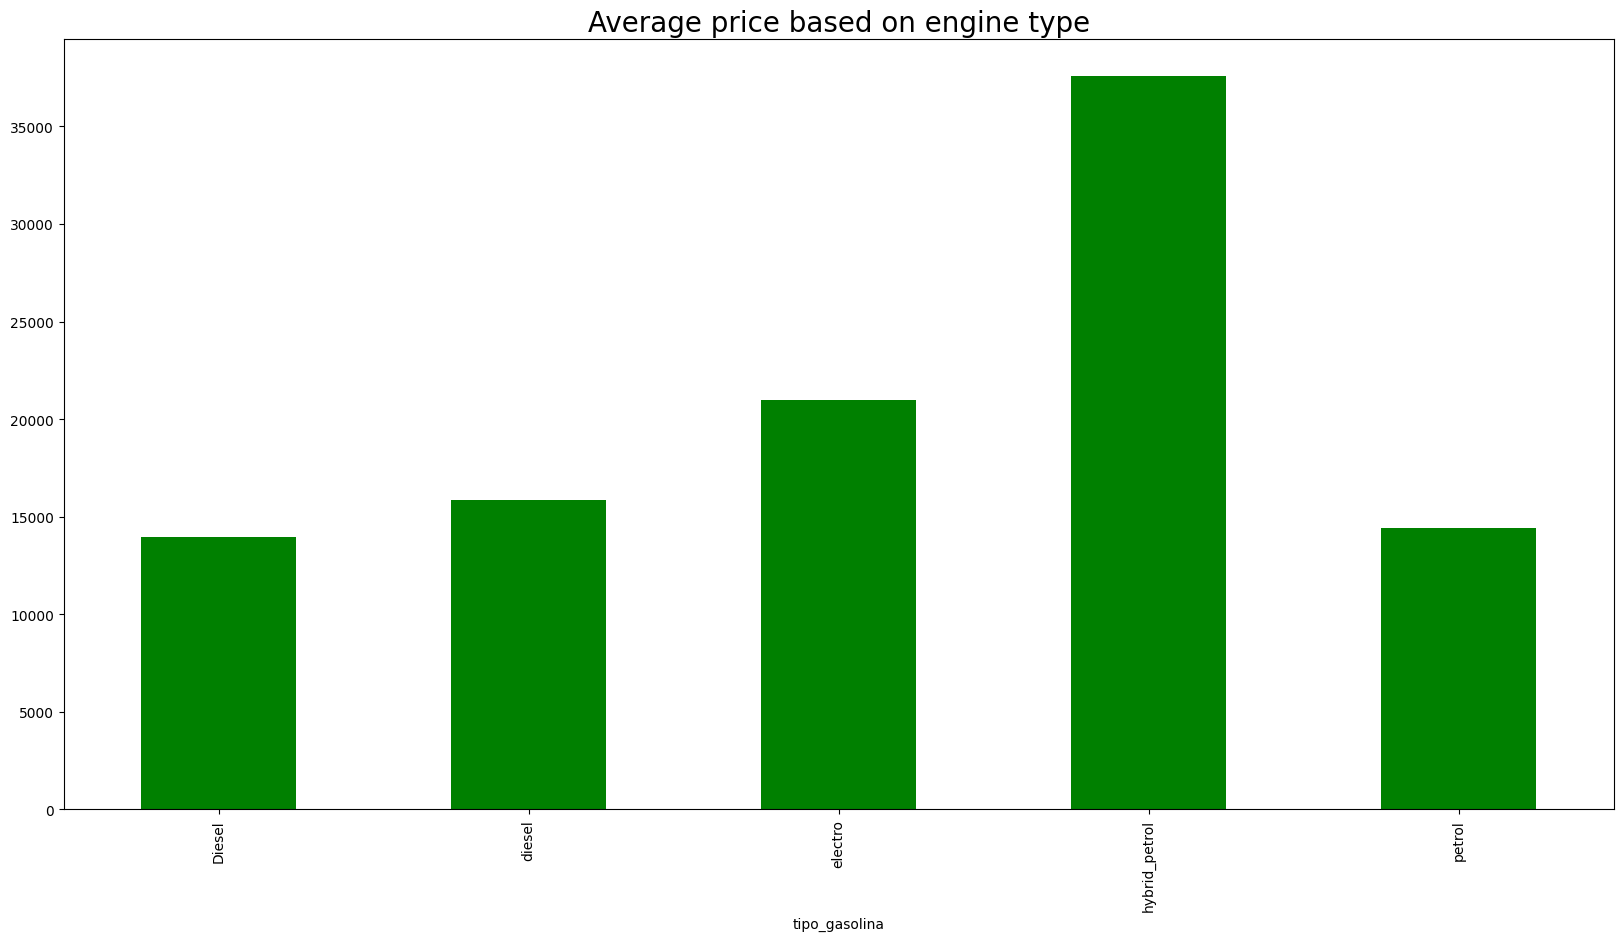

In [391]:
plt.figure(figsize=(20,10))
bmw_df.groupby("tipo_gasolina")['precio'].mean().plot(kind='bar', color='green')
plt.title('Average price based on engine type', fontsize=20)

In [392]:
bmw_df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [393]:
bmw_df.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

There are some nalls among the data

In [394]:
bmw_df.duplicated().sum()

0

There are no duplicated rows in the dataset

#Preprossesing

In [395]:
bmw1 = bmw_df.copy()

In [396]:
bmw1.duplicated().sum() #no hay filas duplicadas entre los datos

0

In [397]:
bmw1.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [398]:
bmw1.isnull().sum().sum() 

62

Null values will be deleted since they are not significant in each column. They are a total of 62 in 4843 vlues, the 0,012%.

In [399]:
bmw1.dropna(inplace=True)

In [400]:
bmw1.isnull().sum().sum() 

0

In [401]:
len(bmw1)

4781

In [402]:
#here a function is made, that classify the type of data that is each colum

target=['precio']
def obtener_lista_de_variables(dataset):
  lista_num= []
  lista_bool= []
  lista_cat= []
  
  for i in dataset:
    if (dataset[i].dtype.kind =='i' or dataset[i].dtype.kind == 'f') and i not in target and len(dataset[i].unique())!=2:
      lista_num.append(i)
    elif ((dataset[i].dtype.kind =='i' or dataset[i].dtype.kind == 'f') and i not in target and len(dataset[i].unique())==2) or dataset[i].dtype.kind =='b':
      lista_bool.append(i)
    elif(dataset[i].dtype.kind == 'O') and i not in target:
      lista_cat.append(i)
  return lista_num, lista_bool, lista_cat

In [403]:
l_num, l_bool, l_cat = obtener_lista_de_variables(bmw1)

In [404]:
l_num

['km', 'potencia']

In [405]:
l_bool

['gps']

In [406]:
l_cat

['marca',
 'modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

<Axes: >

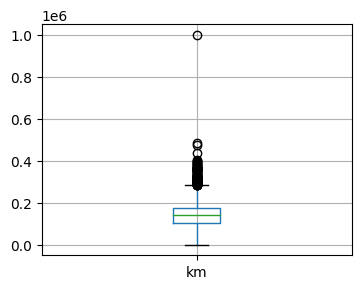

In [407]:
bmw1.boxplot('km', figsize= (4,3))

<Axes: >

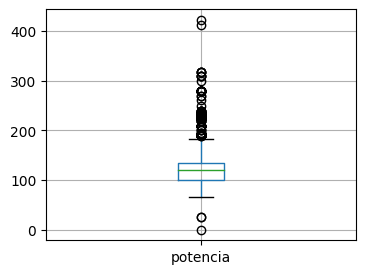

In [408]:
bmw1.boxplot('potencia', figsize= (4,3))

In [409]:
n = bmw1[(bmw1['km']<0) | (bmw1['km']>500000)]
n
 #datos de km menores a 0 o maores a 500000 son considerados outliers (500000 por que no se venden autos con tanto kilometraje)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01
3732,BMW,118,1000376.0,90.0,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,2018-06-01


In [410]:
len(bmw1)

4781

In [411]:
bmw1.drop(n.index, inplace=True)
len(bmw1)

4779

In [412]:
n= bmw1[(bmw1['potencia']<20)] 
n
# me gutarias saber como conseguir el dato de los valores de los bigotes, tambien creo que la potencia maxima no sera un outlier

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01


In [413]:
bmw1.drop(no.index, inplace=True)
len(bmw1)

4775

<Axes: >

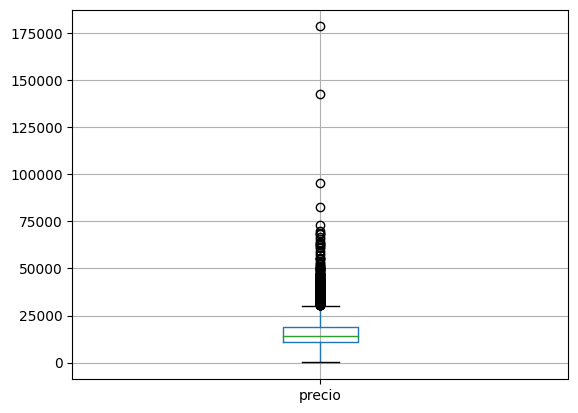

In [414]:
bmw1.boxplot('precio')

In [415]:
n= bmw1[(bmw1['precio']<500)] #muy barato??
n

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,BMW,320,179358.0,120.0,2013-06-01,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,2018-03-01
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,2018-04-01
1255,BMW,320,170381.0,135.0,2013-07-01,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,2018-05-01
1513,BMW,520,358332.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1558,BMW,520,358333.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,2018-03-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2829,BMW,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,2018-03-01


In [416]:
bmw1.drop(n.index, inplace=True)

In [417]:
n=bmw1[(bmw1['precio']>100000)] #las caracteristicas de los coches no corresponden al precio tan elevado. los considerare erroneos
n

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4684,BMW,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01
4753,BMW,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01


In [418]:
bmw1.drop(n.index, inplace=True)

In [419]:
l_cat

['marca',
 'modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [420]:
for i in l_cat:
  print(bmw1[i].value_counts())

BMW    4759
Name: marca, dtype: int64
320                733
520                622
318                550
X3                 435
116                355
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
diesel           4557
petrol            186
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64
black     1604
grey      1158
blue       693
white      526
brown      340
silver     322
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64
estate         1555
sedan          1159
suv            1053
hatchback       698
subcompact      112
coupe            95
convertible      46
van              41
Name: tipo_coche, dtype: int64
True     2628
False    2131
Name: volante_regulable, dtype: int64
True     3790
False     969
Name: aire_acondicionado, dtype: int64
False    3796
True      96

In [421]:
#Diesel=diesel
#fecha registro hacer grfico(info en .date?)
#fecha_venta uotliers 2007-8-9-10

In [422]:
bmw1['tipo_gasolina']=np.where(bmw1['tipo_gasolina']=='Diesel', 'diesel', bmw1['tipo_gasolina'] )

In [423]:
bmw1['tipo_gasolina'].value_counts() 

diesel           4562
petrol            186
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

<Axes: >

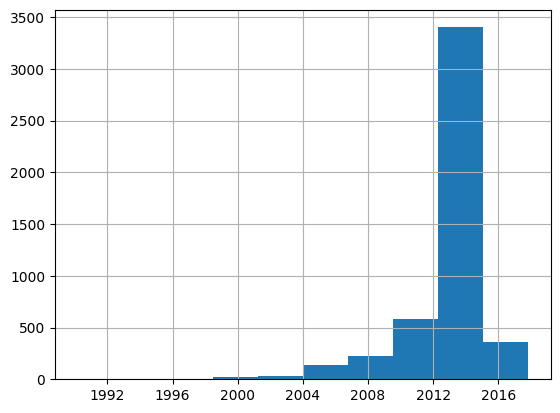

In [424]:
date=pd.to_datetime(bmw1['fecha_registro'])
date.hist()

In [425]:
bmw1['fecha_registro'].min()

Timestamp('1990-03-01 00:00:00')

<Axes: >

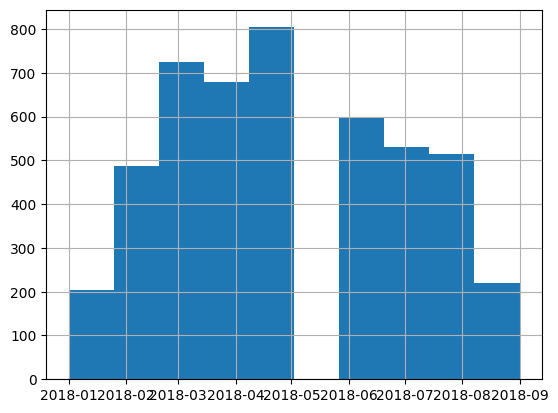

In [426]:
date=pd.to_datetime(bmw1['fecha_venta'])
date.hist()

In [427]:
bmw1['fecha_venta'].min()

Timestamp('2018-01-01 00:00:00')

In [428]:
len(bmw1)

4759

In [429]:
min='2018-01-01'
min=pd.to_datetime(min)
n=bmw1[(date<min)]
n                    #ventas anteriores al 2018 seran consideradas datos erroneos 

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [430]:
bmw1.drop(n.index, inplace=True)
len(bmw1)

4759

In [431]:
l_bool

['gps']

In [432]:
corr = bmw1.corr()

<ipython-input-432-7acba742be4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bmw1.corr()


In [433]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio
km,1.000000,-0.040629,0.155930,-0.425867
potencia,-0.040629,1.000000,0.009139,0.673710
gps,0.155930,0.009139,1.000000,0.002609
precio,-0.425867,0.673710,0.002609,1.000000


In [434]:
l_cat

['marca',
 'modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [435]:
l_tf= ['volante_regulable',
      'aire_acondicionado',
      'camara_trasera',
      'asientos_traseros_plegables', 'elevalunas_electrico',
      'bluetooth',
      'gps', 
      'alerta_lim_velocidad']
#genero lista con columnas categoricas que solo pueden tomar dos valores distintos; y tambien agregue gps que es buleana

In [436]:
for i in l_tf:
  bmw1[i]=bmw1[i].astype(int)

In [437]:
for i in l_tf:
  print(bmw1[i].value_counts()) #hago esto por que al poder tomar solo dos valores no hace falta crear dos columnas, con una buleana es suficiente.

1    2628
0    2131
Name: volante_regulable, dtype: int64
1    3790
0     969
Name: aire_acondicionado, dtype: int64
0    3796
1     963
Name: camara_trasera, dtype: int64
0    3802
1     957
Name: asientos_traseros_plegables, dtype: int64
0    2559
1    2200
Name: elevalunas_electrico, dtype: int64
0    3603
1    1156
Name: bluetooth, dtype: int64
1    4440
0     319
Name: gps, dtype: int64
1    2581
0    2178
Name: alerta_lim_velocidad, dtype: int64


In [438]:
del(bmw1['modelo'])

In [439]:
l_cat1=['marca',
        'tipo_gasolina',
        'color',
        'tipo_coche']  
 # genero una lista con las columnas categoricas que tienen mas de dos valores posibles (fecha registro y fecha venta no las incluyo, no se si es conveniente)

In [440]:
bmw1 = pd.get_dummies(data=bmw1, columns=l_cat1)

In [443]:
bmw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 4841
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   km                           4759 non-null   float64       
 1   potencia                     4759 non-null   float64       
 2   fecha_registro               4759 non-null   datetime64[ns]
 3   volante_regulable            4759 non-null   int64         
 4   aire_acondicionado           4759 non-null   int64         
 5   camara_trasera               4759 non-null   int64         
 6   asientos_traseros_plegables  4759 non-null   int64         
 7   elevalunas_electrico         4759 non-null   int64         
 8   bluetooth                    4759 non-null   int64         
 9   gps                          4759 non-null   int64         
 10  alerta_lim_velocidad         4759 non-null   int64         
 11  precio                       4759 non-null 

In [444]:
corr=bmw1.corr()
corr.style.background_gradient(cmap='coolwarm') 
#la revicion manual de esta tabla es muy incomoda, pero entiendo que todavia no aprendimos como hacerlo de otra manera

<ipython-input-444-2a1dc1505c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=bmw1.corr()
/usr/local/lib/python3.9/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.9/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_BMW,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.040629,0.070715,0.025409,0.005457,-0.047947,0.052936,-0.026890,0.155930,-0.031402,-0.425867,nan,0.051678,-0.038587,-0.035755,-0.040564,-0.018266,0.038943,-0.018287,-0.022300,0.058301,0.030010,-0.031354,-0.027056,0.017906,-0.068828,-0.030082,-0.072090,0.185187,-0.112015,0.063382,-0.043235,-0.110603,-0.096754
potencia,-0.040629,1.000000,0.326995,0.197278,0.313918,0.448553,0.342127,0.233503,0.009139,0.489575,0.673710,nan,-0.127123,-0.024096,0.025837,0.128330,-0.013103,0.037832,-0.017064,-0.069683,-0.013642,0.004362,0.011382,-0.006146,0.013847,0.009605,0.035296,0.127497,-0.052194,-0.227900,0.035598,-0.158583,0.235227,-0.054772
volante_regulable,0.070715,0.326995,1.000000,0.306520,0.254763,0.231441,0.280643,0.133653,0.241901,0.223689,0.282819,nan,0.003790,0.005781,0.016321,-0.008095,-0.016647,0.018991,0.005168,0.043060,0.014182,0.052719,0.008177,-0.033501,-0.024923,-0.109792,0.054411,0.028820,-0.001529,-0.153424,0.056098,-0.108290,0.103342,-0.053226
aire_acondicionado,0.025409,0.197278,0.306520,1.000000,0.150771,0.148231,0.283582,0.133092,0.371520,0.222601,0.259692,nan,0.086151,0.012699,0.008011,-0.091894,0.013259,0.034880,0.000155,0.049087,-0.028350,0.025277,-0.011445,-0.053800,-0.044536,-0.071394,-0.046047,-0.036026,0.097482,-0.089794,0.055911,-0.148687,-0.013318,-0.003680
camara_trasera,0.005457,0.313918,0.254763,0.150771,1.000000,0.201408,0.200181,0.142794,0.061805,0.202328,0.260778,nan,-0.010860,-0.012650,-0.007901,0.014472,-0.024315,0.013748,0.001140,-0.013809,0.003047,0.003260,-0.017895,-0.021944,-0.004493,0.004274,-0.044414,0.021600,-0.034190,-0.047668,-0.007954,-0.040242,0.110782,-0.024315
asientos_traseros_plegables,-0.047947,0.448553,0.231441,0.148231,0.201408,1.000000,0.249831,0.154689,0.126093,0.278833,0.441027,nan,0.072676,-0.012601,0.005007,-0.074131,-0.001389,0.024895,-0.030257,-0.029252,0.020329,-0.019384,-0.003052,-0.006394,0.056875,0.000377,-0.049566,-0.022878,-0.151677,-0.154652,-0.129550,-0.077888,0.494129,-0.041097
elevalunas_electrico,0.052936,0.342127,0.280643,0.283582,0.200181,0.249831,1.000000,0.256116,0.201342,0.336563,0.276198,nan,-0.006200,-0.023287,-0.007184,0.010908,-0.022590,0.078014,-0.037473,-0.031378,-0.022802,-0.013086,0.014565,-0.026919,-0.034995,0.014570,0.007474,0.096673,0.043268,-0.097298,0.021814,-0.102243,0.031695,-0.077314
bluetooth,-0.026890,0.233503,0.133653,0.133092,0.142794,0.154689,0.256116,1.000000,0.128315,0.122009,0.226523,nan,-0.024959,-0.014226,-0.011282,0.029883,-0.020992,0.027340,0.006480,-0.058192,-0.002972,-0.039154,0.007492,0.036223,-0.019931,0.062870,0.069244,0.101325,-0.022693,0.015859,-0.022296,-0.045917,0.006159,-0.020992
gps,0.155930,0.009139,0.241901,0.371520,0.061805,0.126093,0.201342,0.128315,1.000000,-0.060705,0.002609,nan,0.049752,0.006732,-0.009512,-0.050002,0.015895,0.050692,0.008224,0.041727,0.002827,0.022758,-0.014156,-0.012905,-0.038192,-0.119902,0.009305,-0.003797,0.050580,0.011371,0.034629,0.036070,-0.108128,-0.038657
alerta_lim_velocidad,-0.031402,0.489575,0.223689,0.222601,0.202328,0.278833,0.336563,0.122009,-0.060705,1.000000,0.464770,nan,-0.004571,0.006267,0.037695,-0.004082,0.008051,0.035766,-0.028509,-0.035037,-0.025850,-0.009860,-0.014905,-0.027279,0.003974,0.030574,-0.004085,0.022548,0.014082,-0.174721,0.025969,-0.141178,0.155373,-0.019332


In [445]:
bmw2=bmw1.copy()

In [ ]:
bmw2.info()

###Scaling

In [447]:
from sklearn.preprocessing import MinMaxScaler

In [448]:
nms= MinMaxScaler()

In [449]:
bmw2[l_num].head()

,km,potencia
0,140411.0,100.0
1,13929.0,317.0
2,183297.0,120.0
3,128035.0,135.0
4,97097.0,160.0


In [450]:
for i in l_num:
  bmw2[i]=nms.fit_transform(bmw2[i].values.reshape(-1,1))

In [451]:
bmw2[l_num].head()


,km,potencia
0,0.289039,0.236407
1,0.027787,0.749409
2,0.377621,0.283688
3,0.263476,0.319149
4,0.199573,0.378251


In [452]:
del(bmw2['fecha_registro'])
del(bmw2['fecha_venta'])

In [453]:
bmw_listo=bmw2.copy()

In [454]:
bmw_listo.head(15)

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.289039,0.236407,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.027787,0.749409,1,1,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0.377621,0.283688,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,0.263476,0.319149,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0.199573,0.378251,1,1,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
5,0.313703,0.531915,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
6,0.422901,0.342790,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
7,0.237709,0.248227,1,1,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,0,0
8,0.254906,0.295508,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
9,0.287242,0.319149,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [455]:
bmw_listo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 0 to 4841
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4759 non-null   float64
 1   potencia                     4759 non-null   float64
 2   volante_regulable            4759 non-null   int64  
 3   aire_acondicionado           4759 non-null   int64  
 4   camara_trasera               4759 non-null   int64  
 5   asientos_traseros_plegables  4759 non-null   int64  
 6   elevalunas_electrico         4759 non-null   int64  
 7   bluetooth                    4759 non-null   int64  
 8   gps                          4759 non-null   int64  
 9   alerta_lim_velocidad         4759 non-null   int64  
 10  precio                       4759 non-null   float64
 11  marca_BMW                    4759 non-null   uint8  
 12  tipo_gasolina_diesel         4759 non-null   uint8  
 13  tipo_gasolina_elec

In [456]:
bmw_listo.columns

Index(['km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'marca_BMW',
       'tipo_gasolina_diesel', 'tipo_gasolina_electro',
       'tipo_gasolina_hybrid_petrol', 'tipo_gasolina_petrol', 'color_beige',
       'color_black', 'color_blue', 'color_brown', 'color_green', 'color_grey',
       'color_orange', 'color_red', 'color_silver', 'color_white',
       'tipo_coche_convertible', 'tipo_coche_coupe', 'tipo_coche_estate',
       'tipo_coche_hatchback', 'tipo_coche_sedan', 'tipo_coche_subcompact',
       'tipo_coche_suv', 'tipo_coche_van'],
      dtype='object')

In [457]:
#analizar corelatividad de columnas y ver si hay que dividir columnas o cosas asi.

#Model


In [458]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

After the data preprocessing, we proceed to define the variables needed for the models

In [459]:
X = bmw_listo.drop( columns = 'precio', axis=1)
y = bmw_listo['precio']

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

Now the data is splitted into training and test data. The train data is used to train the model under considerations.

In [461]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_predict1 = model1.predict( X_test)

We will first start with a very simple model such as Linear Regression and slowly increase the complexity and how this accounts for an increase or decrease in the mean squared error

In [462]:
y_predict1 = pd.DataFrame(y_predict1, columns= ['Predicted_Output'])

Now the test set is use as input to make predictions, and we calculate the mean_erros to see the model's performance so that they will be plot all together to make a comparaison of the model's performance

In [463]:
results = pd.concat([y_predict1, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In order to plot the actual vs the predicted output it's needed to create a dataframe with the predicted and acutal values, this is also a way to see the model's performance. If the actual values get closer to the predicted ones, the model is doing well.

Text(0.5, 1.0, 'Comparaison between actual and predicted values')

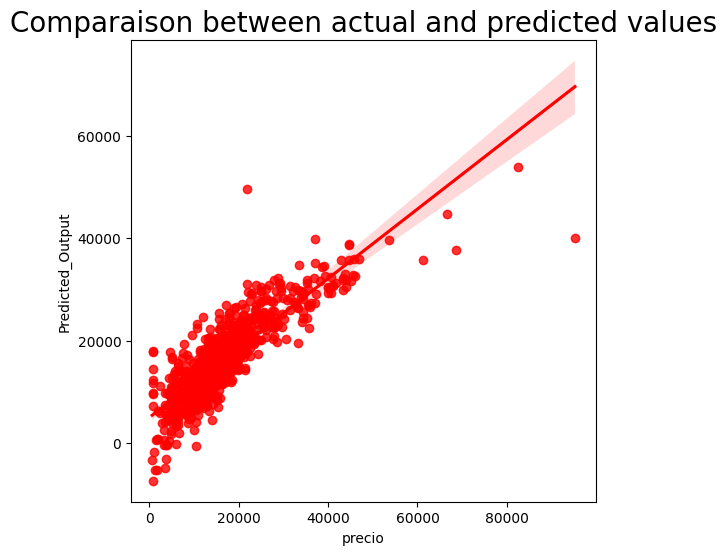

In [464]:
plt.figure(figsize=(6,6))
sns.regplot(data= results, y= 'Predicted_Output', x='precio', color='red')
plt.title('Comparaison between actual and predicted values', fontsize=20)

As we can see linear regression model is not doing very well since there is a big scatter in the output plot, it means that our model is not doing well on the test set.



In [467]:
mse_linear = mean_squared_error(y_predict1, y_test)
mae_linear = mean_absolute_error(y_predict1, y_test)

In [466]:
from sklearn.svm import SVR

In [468]:
model2 = SVR()
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test)


In [469]:
y_predict2 = pd.DataFrame( y_predict2, columns= ['Predicted_output_svr'])

In [470]:
result2 = pd.concat([y_predict2, y_test.to_frame().reset_index(drop= True)], axis=1, ignore_index= False)

In [471]:
result2

,Predicted_output_svr,precio
0,14299.037921,23700.0
1,14320.626252,30200.0
2,14535.743597,40000.0
3,14179.756176,12900.0
4,14325.239736,15600.0
...,...,...
947,14343.958478,15200.0
948,14095.207545,10600.0
949,14125.396293,3300.0
950,14304.308164,19300.0


Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

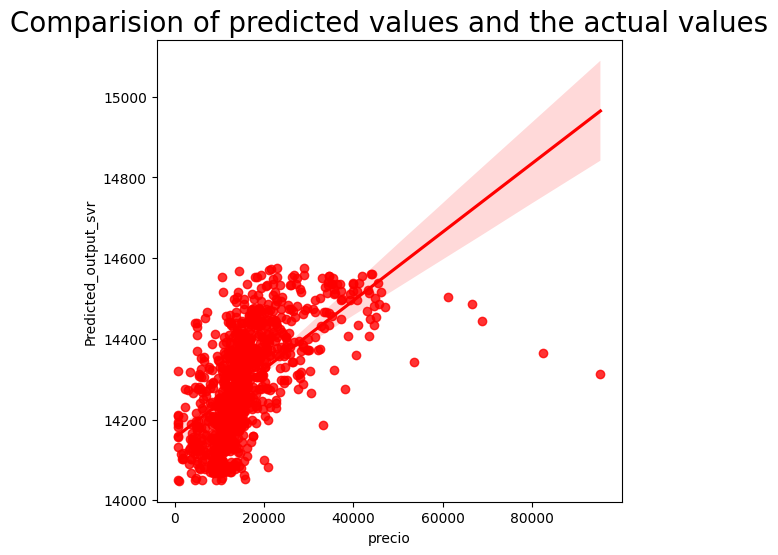

In [472]:
plt.figure(figsize= (6,6))
sns.regplot(data = result2, x='precio', y= 'Predicted_output_svr', color='red')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)

In [350]:
mse_svr = mean_squared_error(y_predict2, y_test)
mae_svr = mean_absolute_error(y_predict2, y_test)

This plot clearly indicates that the model is not performing better than the Linear Regression model as the points between the prediction and the actual values are quite scattered from the line

In [473]:
from sklearn.neighbors import KNeighborsRegressor

In [474]:
model3= KNeighborsRegressor()
model3.fit(X_train, y_train)
y_predict3 = model3.predict( X_test)

In [475]:
y_predict3 = pd.DataFrame( y_predict3, columns= ['predicted_output_KNR'])
result3 = pd.concat([y_predict3, y_test.to_frame().reset_index(drop=True)], axis= 1, ignore_index=False)

In [476]:
mse_knr = mean_squared_error(y_predict3, y_test)
mae_knr = mean_absolute_error(y_predict3, y_test)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

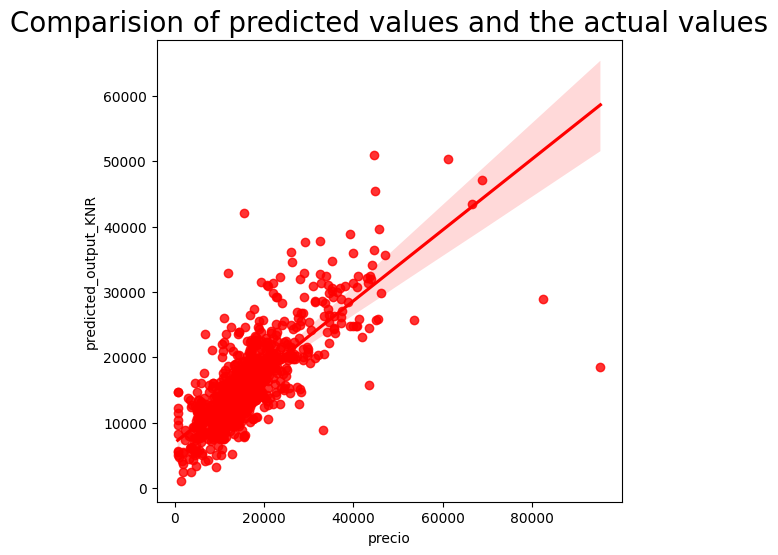

In [480]:
plt.figure(figsize= (6,6))
sns.regplot(data = result3, x='precio', y= 'predicted_output_KNR', color='red')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)

As we can see K-neighbors Regression doesn't work very well since the actual values doesn't rely on the line prediction.

In [481]:
from sklearn.tree import DecisionTreeRegressor

In [482]:
model4 = DecisionTreeRegressor()
model4.fit( X_train, y_train)
y_predict4 = model4.predict(X_test)

In [483]:
y_predict4 = pd.DataFrame( y_predict4, columns=[ 'predicted_output_dtr'])
result4= pd.concat([y_predict4, y_test.to_frame().reset_index(drop= True)], axis=1, ignore_index=False)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

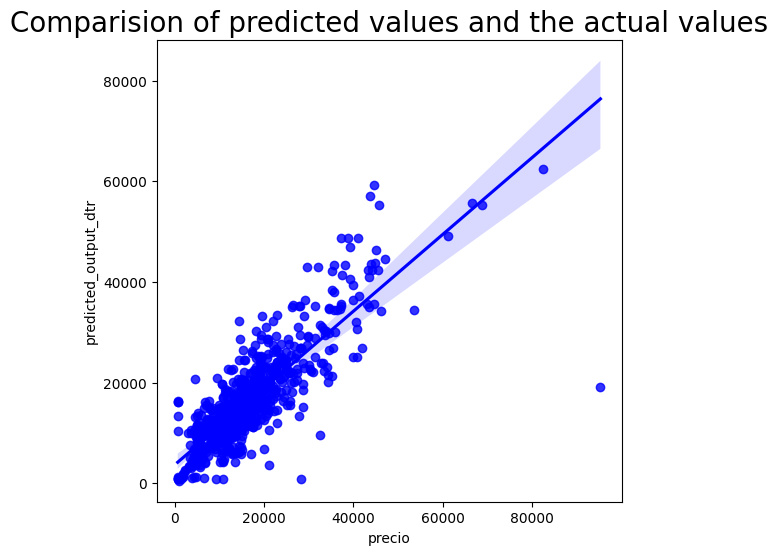

In [484]:
plt.figure(figsize=( 6, 6))
sns.regplot( data = result4, x= 'precio', y='predicted_output_dtr', color='blue')
plt.title('Comparision of predicted values and the actual values', fontsize = 20)

Decision tree regressor seems to work better than the two prevous model although so far, Linear regressor is the one which is working better.

In [485]:
mse_dtr = mean_squared_error(y_predict4, y_test)
mae_dtr = mean_absolute_error(y_predict4, y_test)

In [486]:
from sklearn.ensemble import GradientBoostingRegressor

In [487]:
model5 = GradientBoostingRegressor()
model5.fit(X_train, y_train)
y_predict5= model5.predict(X_test)

In [488]:
y_predict5 = pd.DataFrame( y_predict5, columns= ['predicted_output_gbr'])
result5 = pd.concat([y_predict5, y_test.to_frame().reset_index(drop=False)], axis=1, ignore_index=False)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

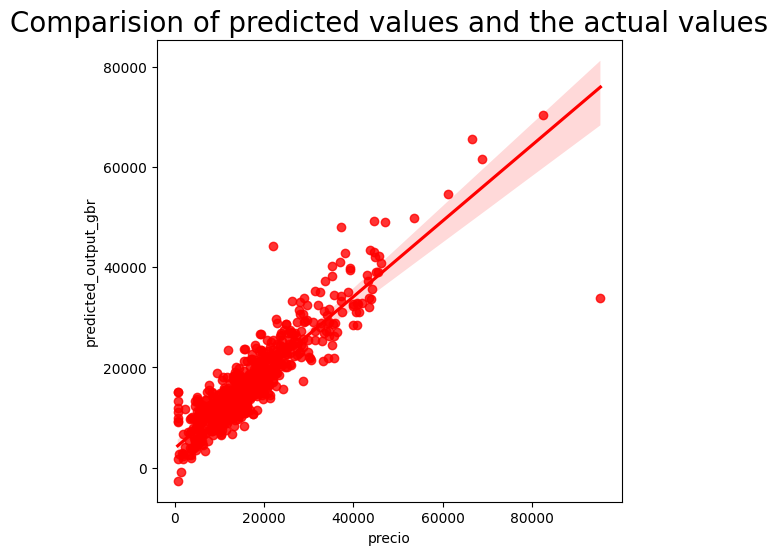

In [489]:
plt.figure(figsize=( 6, 6))
sns.regplot( data = result5, x= 'precio', y='predicted_output_gbr', color='red')
plt.title('Comparision of predicted values and the actual values', fontsize = 20)

In [490]:
mse_gbd = mean_squared_error(y_predict5, y_test)
mae_gbd = mean_absolute_error(y_predict5, y_test)

It's seems that gradient boosting regressor works better than the prevoius models, noting that the time complexity of this model is also high compared to the rest. On the other hand, the mean absolute error (MAE) and mean squared error (MSE) are two common ways to calculate the average error. Both measures are used to evaluate the performance of regression models, which predict a continuous value. So let's plot them.

In [492]:
data= { 'mean_squeared_error': [mse_linear,  mse_svr, mse_dtr, mse_knr, mse_gbd], 'mean_abs_error':[mae_linear, mae_svr, mae_dtr, mae_knr, mae_gbd] }
df_1= pd.DataFrame(data, index= ['linear_reg', 'suport_vector', 'decision_tree','K-neighbors', 'gradient_boosting' ])

In [493]:
df_1

,mean_squeared_error,mean_abs_error
linear_reg,2.476731e+07,3311.037011
suport_vector,9.088588e+07,6088.833973
decision_tree,2.816886e+07,3276.155462
K-neighbors,3.639629e+07,3725.462185
gradient_boosting,1.681444e+07,2623.302594


Text(0.5, 1.0, 'Barplot of various machine learning regression models with mean absolute error')

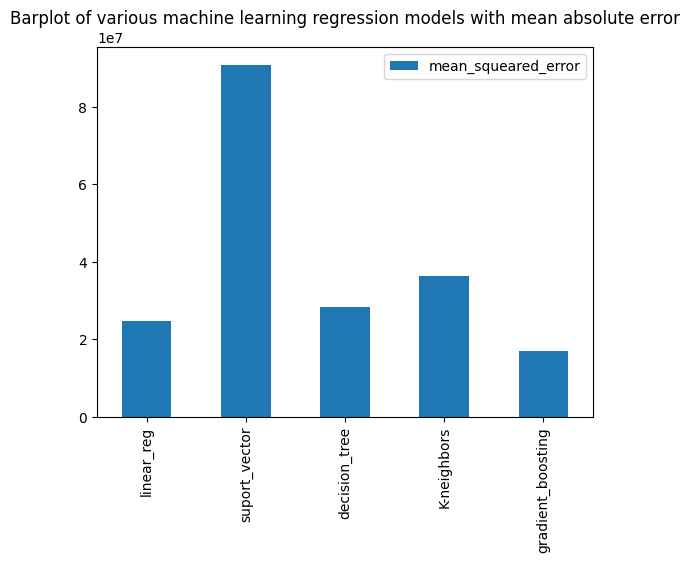

In [494]:
df_1.plot.bar( y= 'mean_squeared_error')
plt.title("Barplot of various machine learning regression models with mean absolute error")
     

Based on the different model's outcomes it's clear that gradient boosting is the one working better followed by linear regression. Suport vector regression and K-neighbors should be not taking into consideration.However, the same model might perform the best for other tasks. Therefore, we should explore many models before deploying them in real-time.

On the other hand, we could increase the accuracy of our model in multiples ways by:

-Using regularization (L1, L2 or L1+L2).

-Using cross-validation

-Tuning hyperparameters

-Or using more ensembles, we already use gradient boosting regressor (which is an ensemble created from decision trees added sequentially to the model).